In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier



In [2]:
# read the data

df = pd.read_csv('SaYoPillow.csv')

In [3]:
# renaming

df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

In [4]:
y = df["stress_level"]
X = df.drop(["stress_level"], axis= 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)


In [6]:
X_train

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
310,85.040,23.344,90.672,13.680,88.672,96.68,0.672,68.36
588,66.720,20.672,92.672,10.672,90.672,88.36,3.008,61.68
196,45.960,16.384,96.576,4.768,95.384,63.84,7.384,50.96
481,46.960,16.784,97.176,5.568,95.784,67.84,7.784,51.96
259,69.440,20.944,92.944,10.944,90.944,89.72,3.416,62.36
...,...,...,...,...,...,...,...,...
71,96.192,26.192,85.240,17.096,82.288,100.24,0.000,75.48
106,62.240,20.224,92.224,10.224,90.224,86.12,2.336,60.56
270,98.848,28.848,88.560,18.424,86.272,103.56,0.000,82.12
435,72.800,21.280,93.280,11.280,91.280,91.40,3.920,63.20


In [7]:
rf_model = RandomForestClassifier(criterion='entropy').fit(X_train, y_train)

In [8]:
y_pred = rf_model.predict(X_train)
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        97

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472

1.0


In [9]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.97      0.98        31
           2       0.97      1.00      0.99        33
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        29

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158

0.9936708860759493


In [10]:
X.columns

Index(['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'],
      dtype='object')

In [11]:
newData = [[93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20]]
rf_model.predict(newData)

C:\Users\shiha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

Text(0.5, 0, 'Variables Importance Ratio')

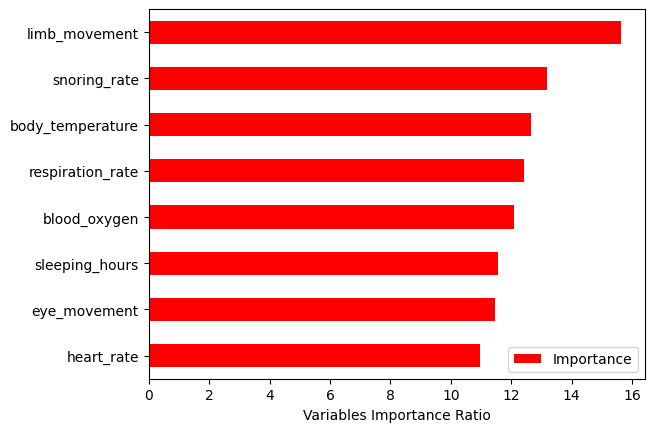

In [12]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "r")

plt.xlabel("Variables Importance Ratio")

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.97      0.98        31
           2       0.97      1.00      0.99        33
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        29

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



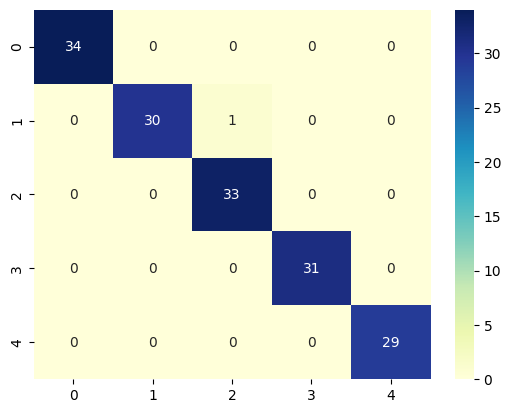

In [14]:
mat = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')

In [15]:
# save the model

import pickle
pickle.dump(rf_model, open('model.pkl','wb'))



In [16]:
# load the model
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20]]))


[3]


C:\Users\shiha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
[[96.288,26.288,85.36,17.144,82.432,100.36,0,75.72]]

In [18]:
print(model.predict([[96.288,26.288,85.36,17.144,82.432,100.36,0,75.72]]))


[4]


C:\Users\shiha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


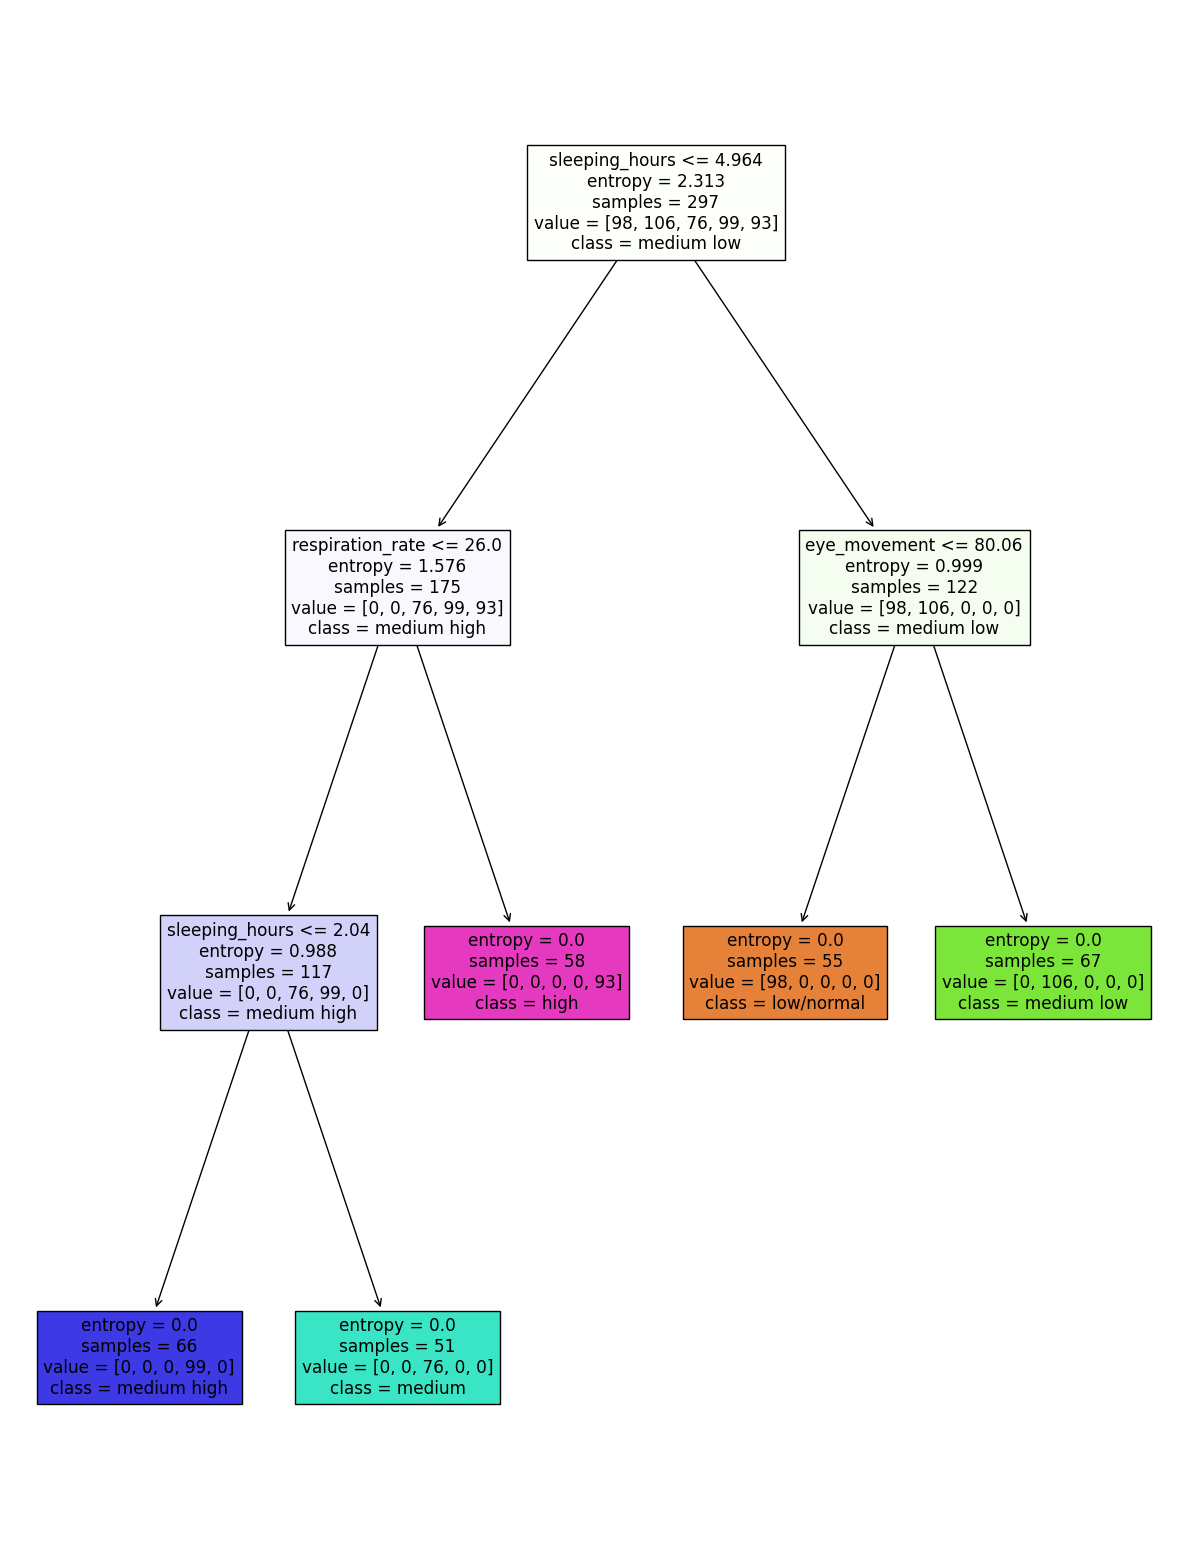

In [17]:
# plot the random forest tree using draw()

from sklearn import tree

plt.figure(figsize=(15,20))
tree.plot_tree(rf_model.estimators_[0],feature_names=df.columns,class_names=["low/normal", "medium low", "medium", "medium high", "high"], filled=True)
plt.show()
